In [73]:
load("wild_mosaics.py")

In [42]:
M = matrix([[0,2,1,0,0],[2,9,10,1,0],[3,10,9,10,1],[0,3,7,8,4],[0,0,3,4,0]]); W = Mosaic(M);

In [43]:
W.matrix() 

[ 0  2  1  0  0]
[ 2  9 10  1  0]
[ 3 10  9 10  1]
[ 0  3  7  8  4]
[ 0  0  3  4  0]

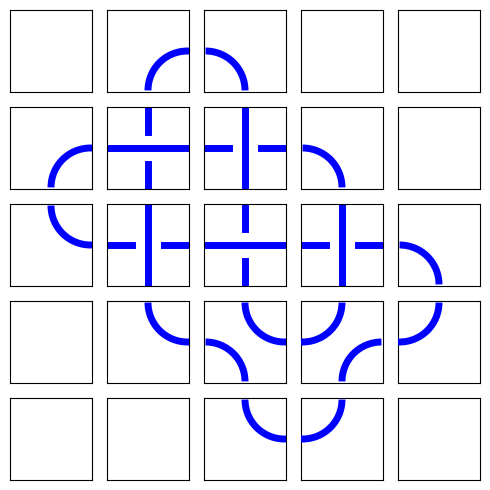

In [44]:
W.show()

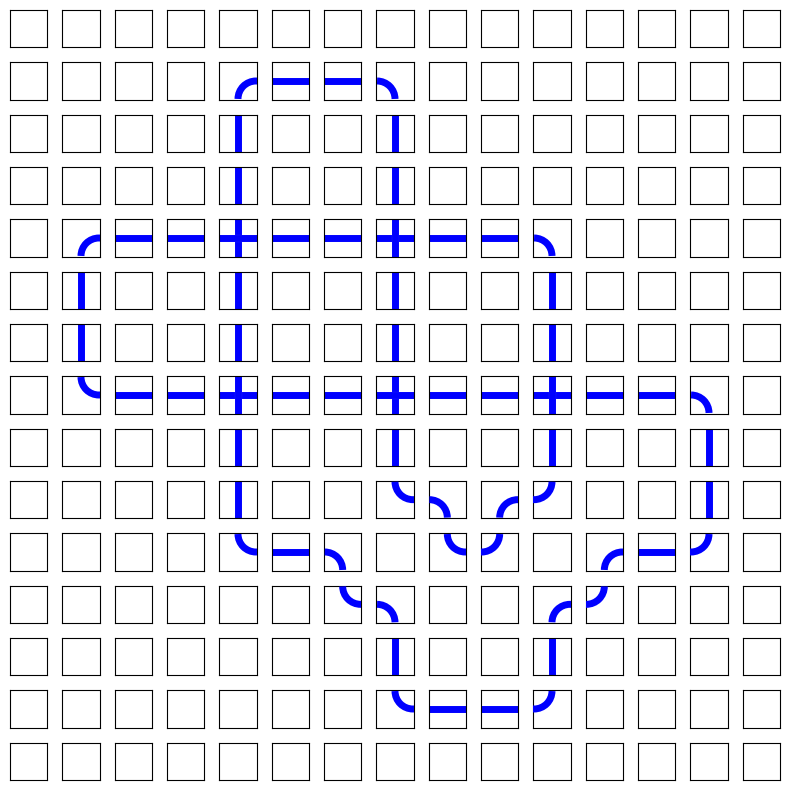

[(4, 7), (4, 8), (4, 9), (4, 10), (5, 10), (6, 10), (7, 10)]

In [45]:
W = Mosaic(M).zoom(); W.show(8)
W.walk((4,7), 'right', pathList = True) # Putting 'True' provides the pathing

In [46]:
W.strandOf((4,4), direction = 'right')

[(4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (5, 10),
 (6, 10),
 (7, 10),
 (8, 10),
 (9, 10),
 (9, 9),
 (10, 9),
 (10, 8),
 (9, 8),
 (9, 7),
 (8, 7),
 (7, 7),
 (6, 7),
 (5, 7),
 (4, 7),
 (3, 7),
 (2, 7),
 (1, 7),
 (1, 6),
 (1, 5),
 (1, 4),
 (2, 4),
 (3, 4),
 (4, 4),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 4),
 (9, 4),
 (10, 4),
 (10, 5),
 (10, 6),
 (11, 6),
 (11, 7),
 (12, 7),
 (13, 7),
 (13, 8),
 (13, 9),
 (13, 10),
 (12, 10),
 (11, 10),
 (11, 11),
 (10, 11),
 (10, 12),
 (10, 13),
 (9, 13),
 (8, 13),
 (7, 13),
 (7, 12),
 (7, 11),
 (7, 10),
 (7, 9),
 (7, 8),
 (7, 7),
 (7, 6),
 (7, 5),
 (7, 4),
 (7, 3),
 (7, 2),
 (7, 1),
 (6, 1),
 (5, 1),
 (4, 1),
 (4, 2),
 (4, 3)]

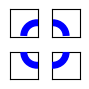

In [47]:
A = matrix([[2,1],[3,4]])
Mosaic(A)
Mosaic(A).show(1)

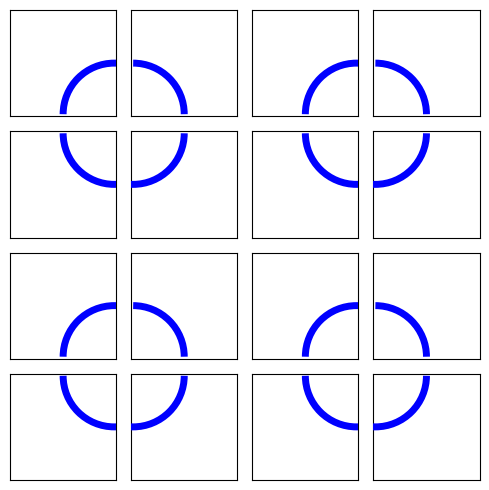

In [48]:
Mosaic(block_matrix([[A,A], [A,A]])).show()

In [49]:
block_matrix([[10,0,0], [A,0,A],[A,A,A]])

[10  0| 0  0| 0  0]
[ 0 10| 0  0| 0  0]
[-----+-----+-----]
[ 2  1| 0  0| 2  1]
[ 3  4| 0  0| 3  4]
[-----+-----+-----]
[ 2  1| 2  1| 2  1]
[ 3  4| 3  4| 3  4]

In [50]:
def jordan_block_modified(eigenvalue, size, sparse=False):
    try:
        size = ZZ(size)
    except TypeError:
        msg = "size of block needs to be an integer, not {0}"
        raise TypeError(msg.format(size))
    if size < 0:
        msg = "size of block must be nonnegative, not {0}"
        raise ValueError(msg.format(size))
    block = diagonal_matrix([eigenvalue] * size, sparse=sparse)
    for i in range(size - 1):
        block[i, i + 1] = 4
    for i in range(size):
        if i > 0:
            block[i, i - 1] = 2
    return block[::-1,:]

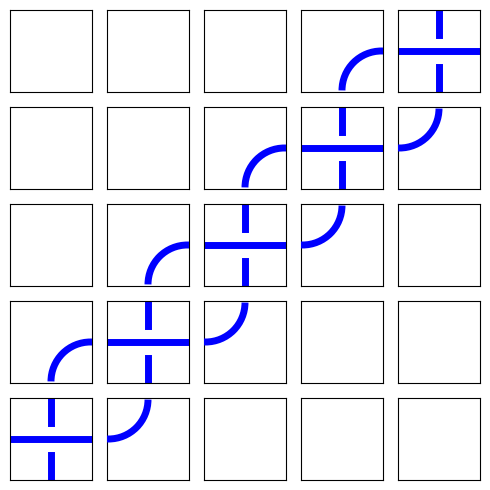

In [51]:
Mosaic(jordan_block_modified(9,5)).show()

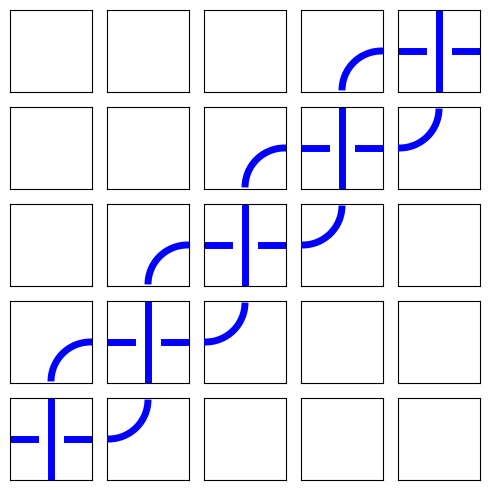

In [60]:
tangleConstructor(5).show()

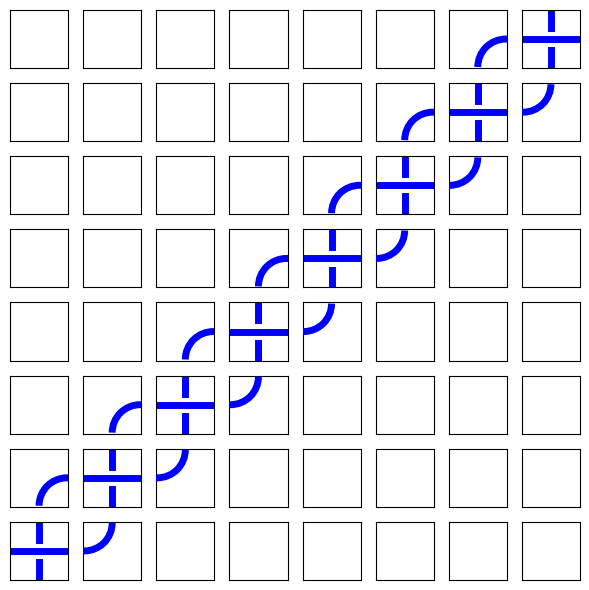

In [ ]:
tangleConstructor(-8).show()

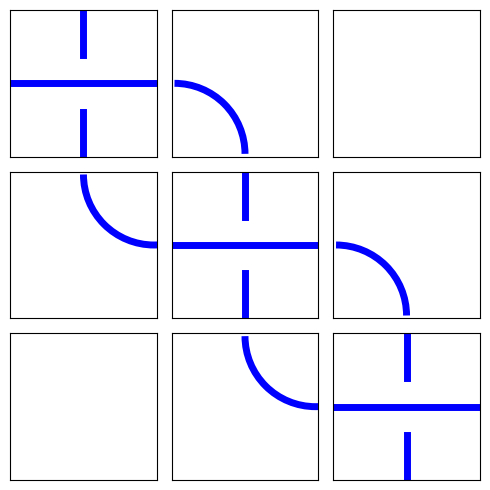

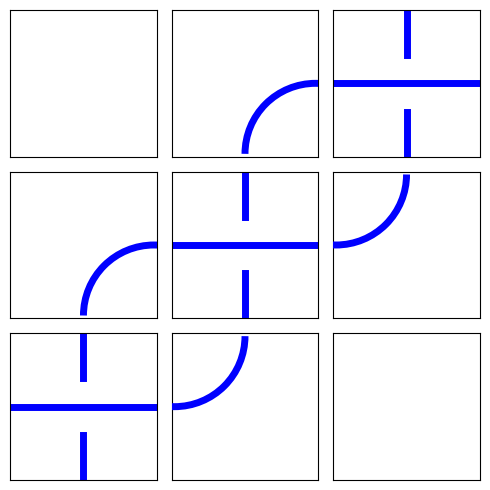

In [78]:
load("wild_mosaics.py")
tangleConstructor(-3, flip = True).show()
tangleConstructor(-3, flip = False).show()

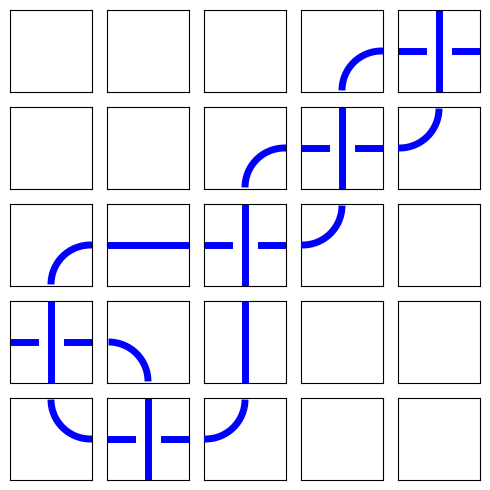

In [98]:
B = block_matrix([[matrix([[0,0],[0,0],[2,5]]),tangleConstructor(3, flip = False).matrix()],[tangleConstructor(2, flip = True).matrix(),matrix([[6,0,0],[4,0,0]])]])
Mosaic(B).show()

In [104]:
 #other one is transpose? need to write a mosaic "rotate/flip/refelect" method, maybe not now
 #issue is upon reflecting, tiles need to be flipped to their correct orientation
 #for now lets settle with a "flip" optional argument
def tangleConnector(n,m, direction):
    assert direction in ['bottom-right', 'top-left']
    if direction == 'bottom-right':
        row = [6] + [0 for i in range(m-1)]
        matrix_data = [row for i in range(n-1)] + [[4] + [0 for i in range(m-1)]]
        return matrix(matrix_data)
    elif direction == 'top-left':
        row = [0 for i in range(m)]
        matrix_data = [row for i in range(n-1)] + [[2] + [5 for i in range(m-1)]]
        return matrix(matrix_data)

In [109]:
tangleConnector(5, 5, 'bottom-right')

[6 0 0 0 0]
[6 0 0 0 0]
[6 0 0 0 0]
[6 0 0 0 0]
[4 0 0 0 0]